In [ ]:
!pip install --upgrade pandas

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [ ]:
df = pd.read_csv('tweets.csv')

In [ ]:
print(df.shape)

(17410, 8)


In [ ]:
index = []
for i in range(len(df['tweets'])):
    if '@' in df['tweets'][i]:
        index.append(i)

With_mention = df.iloc[index,:].reset_index(drop=True)
With_mention['Tagged_User'] = With_mention['tweets'].apply(lambda x: re.findall(r'@([A-Za-z0-9_]+)',str(x)))
User = With_mention['username'].unique()
With_mention['Tagged_User_Co'] = With_mention['Tagged_User'].apply(lambda x: list(set(x).intersection(User)) )
With_mention['Co_length'] = With_mention['Tagged_User_Co'].apply(lambda x: len(x))
With_mention_2 = With_mention[With_mention['Co_length']>0].reset_index(drop=True)

# Isis Mentions Network

We first create a data frame which contains the information of individual tagging activities in each row.



In [ ]:
for i in range(len(With_mention['tweets'])):
    frame = With_mention.iloc[i,:]
    for j in range(len(frame['Tagged_User'])):
        tmp = pd.DataFrame({'User':[frame['username']],'Mentions':[frame['Tagged_User'][j]],'Time': [frame['time']],'User_numberstatuses':[frame['numberstatuses']],'User_followers':[frame['followers']],'Weight': [1]})
        if i==0 and j==0:
            Mention_net = tmp
        else:
           #Mention_net = Mention_net.append(tmp, ignore_index=True)
            Mention_net = pd.concat([Mention_net, tmp], ignore_index=True)

Then, in order to be more prepared for some extra analysis, a similar data frame will be created that only contains the interactivity between users in the data frame.

In [ ]:
for i in range(len(With_mention_2['tweets'])):
    frame = With_mention_2.iloc[i,:]
    for j in range(len(frame['Tagged_User_Co'])):
        Mentioned_follower = list(df[df['username']==frame['Tagged_User_Co'][j]]['followers'])[0]
        Mehtioned_statuses = list(df[df['username']==frame['Tagged_User_Co'][j]]['numberstatuses'])[0]
        tmp = pd.DataFrame({'Mentioned_statuses':[Mehtioned_statuses],'Mentioned_followers':[Mentioned_follower],'User':[frame['username']],'Mentions':[frame['Tagged_User_Co'][j]],'Time': [frame['time']],'User_numberstatuses':[frame['numberstatuses']],'User_followers':[frame['followers']],'Weight': [1]})
        if i==0 and j==0:
            Mention_net_2 = tmp
        else:
            #Mention_net_2 = Mention_net_2.append(tmp, ignore_index=True)
            Mention_net_2 = pd.concat([Mention_net_2, tmp], ignore_index=True)

In [ ]:
Mention_net = Mention_net[Mention_net['User']!=Mention_net['Mentions']]
Mention_net_2 = Mention_net_2[Mention_net_2['User']!=Mention_net_2['Mentions']]

In [ ]:
Mention_net = Mention_net.reset_index(drop=True)
Mention_net_2 = Mention_net_2.reset_index(drop=True)

In [ ]:
# Display the first 5 rows of Mention_net
print(Mention_net.head(5))

# Display the first 5 rows of Mention_net_2
print(Mention_net_2.head(5))


              User         Mentions            Time  User_numberstatuses  \
0  GunsandCoffee70   KhalidMaghrebi  1/6/2015 22:17                   49   
1  GunsandCoffee70  seifulmaslul123  1/6/2015 22:17                   49   
2  GunsandCoffee70  CheerLeadUnited  1/6/2015 22:17                   49   
3  GunsandCoffee70   KhalidMaghrebi  1/10/2015 0:08                   49   
4  GunsandCoffee70  seifulmaslul123  1/10/2015 0:08                   49   

   User_followers  Weight  
0             640       1  
1             640       1  
2             640       1  
3             640       1  
4             640       1  
   Mentioned_statuses  Mentioned_followers             User         Mentions  \
0                 127                  904  YazeedDhardaa25  YazeedDhardaa25   
1               16688                29209  YazeedDhardaa25      RamiAlLolah   
2               16688                29209  YazeedDhardaa25      RamiAlLolah   
3               16688                29209  YazeedDhard

# In and out degree of network

It is insightful to see how many times a user mentions others and how many times a user is mentioned by the others. For targeting the potential terrorist, in and out degree on social media may be a helpful indicators.

In [ ]:
In_degree = Mention_net.groupby(by=['Mentions'],as_index=False)['Weight'].sum()
Out_degree= Mention_net.groupby(by=['User'],as_index=False)['Weight'].sum()

In [ ]:
In_degree = pd.DataFrame(In_degree).sort_values(by='Weight',ascending=False).reset_index(drop=True)
Out_degree = pd.DataFrame(Out_degree).sort_values(by='Weight',ascending=False).reset_index(drop=True)

In [ ]:
print( 'Most mentioned user is '+str(In_degree['Mentions'][0])+' with ' + str(In_degree['Weight'][0])+' times mentioned by the other users.')
print( 'Most active user is '+str(Out_degree['User'][0])+' with ' + str(Out_degree['Weight'][0])+' times mentioning other users.')

Most mentioned user is RamiAlLolah with 565 times mentioned by the other users.
Most active user is Uncle_SamCoco with 1578 times mentioning other users.


Similarly, in the second data frame where all users and tagged users are in the original data set, we can also see the names of most active and mentioned user.

In [ ]:
In_degree_2 = Mention_net_2.groupby(by=['Mentions'],as_index=False)['Weight'].sum()
Out_degree_2= Mention_net_2.groupby(by=['User'],as_index=False)['Weight'].sum()

In [ ]:
In_degree_2 = pd.DataFrame(In_degree_2).sort_values(by='Weight',ascending=False).reset_index(drop=True)
Out_degree_2 = pd.DataFrame(Out_degree_2).sort_values(by='Weight',ascending=False).reset_index(drop=True)

In [ ]:
print( 'Most mentioned user is '+str(In_degree_2['Mentions'][0])+' with ' + str(In_degree['Weight'][0])+' times mentioned by the other users.')
print( 'Most active user is '+str(Out_degree_2['User'][0])+' with ' + str(Out_degree['Weight'][0])+' times mentioning other users.')

Most mentioned user is RamiAlLolah with 565 times mentioned by the other users.
Most active user is mobi_ayubi with 1578 times mentioning other users.


People should be careful with the one who is consistently active in ISIS social networks, both actively and passively involved should be paid with attention.

# Draw network graphs for the ISIS Twitter Network

In [ ]:
import networkx as nx
network1 = Mention_net.iloc[:,[0,1,2,3,4,5]]
print(network1)
network1 = network1.groupby(by=['Mentions','User'],as_index='False')['Weight'].sum().reset_index(name='Weight')
network1= pd.DataFrame(network1).sort_values(by='Weight',ascending=False).reset_index(drop=True)
network1 = network1[network1['Weight']>20]


                  User         Mentions             Time  User_numberstatuses  \
0      GunsandCoffee70   KhalidMaghrebi   1/6/2015 22:17                   49   
1      GunsandCoffee70  seifulmaslul123   1/6/2015 22:17                   49   
2      GunsandCoffee70  CheerLeadUnited   1/6/2015 22:17                   49   
3      GunsandCoffee70   KhalidMaghrebi   1/10/2015 0:08                   49   
4      GunsandCoffee70  seifulmaslul123   1/10/2015 0:08                   49   
...                ...              ...              ...                  ...   
11962    Uncle_SamCoco          SimNasr  5/13/2016 15:35                 7028   
11963    Uncle_SamCoco          SimNasr  5/13/2016 15:37                 7028   
11964   Mountainjjoool         jdanteff  5/13/2016 15:40                  142   
11965    Uncle_SamCoco    RomainCaillet  5/13/2016 15:45                 7028   
11966    Uncle_SamCoco    _DavidThomson  5/13/2016 15:45                 7028   

       User_followers  Weig

In [ ]:
print('The 10 most frequent tagged user pairs are ')
print(network1.iloc[0:9,:])

The 10 most frequent tagged user pairs are 
          Mentions          User  Weight
0      RamiAlLolah    mobi_ayubi     195
1      Nidalgazaui      warrnews     184
2  ScotsmanInfidel    melvynlion      79
3     DidyouknowVS  warreporter2      70
4  sparksofirhabi3    melvynlion      63
5    spicylatte123    melvynlion      61
6           Ele7vn    melvynlion      58
7        1_texanna    melvynlion      56
8    sassysassyred    melvynlion      54


@melvynlion always tag the other people on Tweet. Maybe he is a key to dig out the social network of ISIS pro!

In [ ]:
G = nx.Graph()
for i in range(len(network1['User'])):
    G.add_edge(network1['User'][i],network1['Mentions'][i],weight=network1['Weight'][i])

(-1.2099999648731787,
 1.2099999966621573,
 -1.214999984941153,
 1.3149999748457895)

<Figure size 640x480 with 0 Axes>

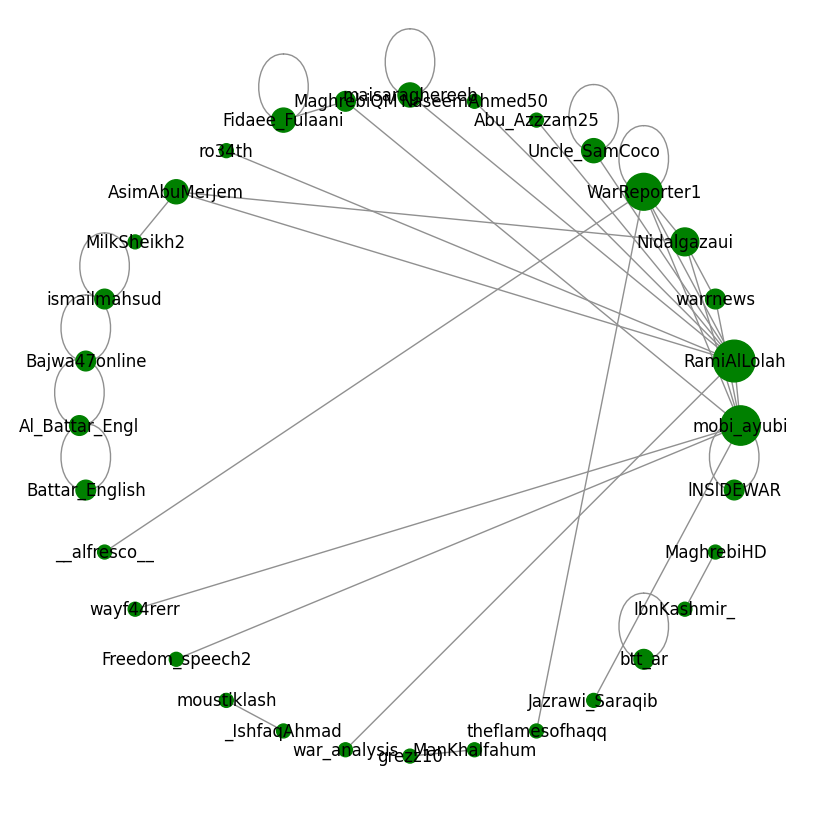

In [ ]:
plt.figure(1)
plt.figure(figsize=(8,8))
degree_dict =  dict(G.degree())
nx.draw_circular(G, node_color='g', edge_color='#909090', node_size=[v*100 for v in degree_dict.values()], with_labels=True)
plt.axis('equal')

# Network within the ISIS pro teams

In [ ]:
network2 = Mention_net_2.iloc[:,[1,2,3,4,7]]
network2 = network2.groupby(by=['Mentions','User'],as_index='False')['Weight'].sum().reset_index(name='Weight')
network2= pd.DataFrame(network2).sort_values(by='Weight',ascending=False).reset_index(drop=True)
network2 = network2[network2['Weight']>10]
import networkx as nx

In [ ]:
print('The 10 most frequent tagged user pairs within the ISIS pro are ')
print(network2.iloc[0:9,:])

The 10 most frequent tagged user pairs within the ISIS pro are 
        Mentions           User  Weight
0    RamiAlLolah     mobi_ayubi     195
1    Nidalgazaui       warrnews     184
2   WarReporter1   WarReporter1     121
3    Nidalgazaui     mobi_ayubi      45
4    RamiAlLolah  Uncle_SamCoco      40
5  Uncle_SamCoco  Uncle_SamCoco      39
6   WarReporter1     mobi_ayubi      38
7    RamiAlLolah   Abu_Azzzam25      34
8    RamiAlLolah  NaseemAhmed50      34


<Figure size 640x480 with 0 Axes>

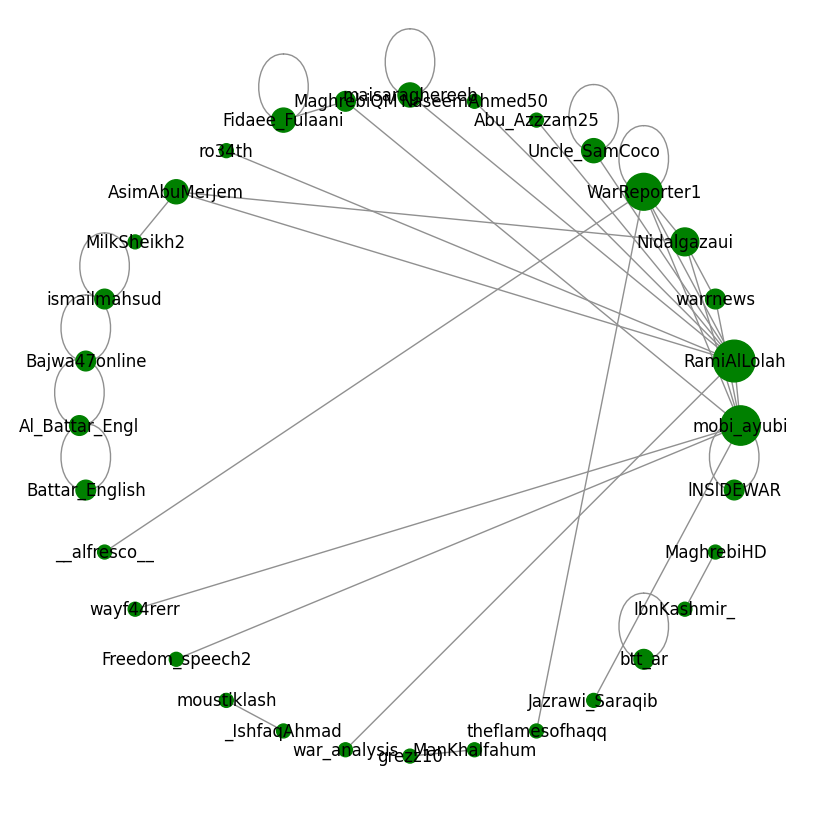

In [ ]:
G = nx.Graph()
for i in range(len(network2['User'])):
    G.add_edge(network2['User'][i], network2['Mentions'][i], weight=network2['Weight'][i])


plt.figure(2)
plt.figure(figsize=(8,8))
#d=d = nx.degree(G)
# Convert the DegreeView to a dictionary

degree_dict =  dict(G.degree())
nx.draw_circular(G, node_color='g', edge_color='#909090', node_size=[v*100 for v in degree_dict.values()], with_labels=True)
plt.axis('equal')
plt.show()


